2017-2018 Applied Mathematics Master's Project

<b>Topic:</b> Classification of sEMG Hand Signals Using Machine Learning Methods

<b>Objective:</b> To process sEMG hand signals, extract out key features from both the time and frequency domains, and
classify these signals with machine learning models such as random forest and gradient boosting. Moreover, to
develop a framework which allows for plug-and-play feature extraction, model choice, and advanced data visualization. 

<b>Data decription:</b> There are two datasets used in this notebook. For one dataset, two males and three females of the same age approximately (20 to 22-year-old) conducted the six grasps for 30 times each. The measured time is 6 sec. For the other dataset, one male subject conducted the six grasps for 100 times each for 3 consecutive days. The measured time is 5 sec. 

<b>How the data was gathered:</b> Subjects were asked to perform these varies grasp movements while two electrodes were placed on their forearms to read the sEMG signals. The performed grasps were as follows: 'Spherical' for holding spherical tools, 'Tip' for holding small tools, 'Palmar' for grasping with palm facing the object, 'Lateral' for holding thin, flat objects, 'Cylindrical' for holding cylindrical tools and 'Hook' for supporting a heavy load.

A link to the datasets used in this notebook and a detailed decription of the data can be found at https://archive.ics.uci.edu/ml/datasets/sEMG+for+Basic+Hand+movements. This data was gathered and
submitted by Christos Sapsanis, Anthony Tzes, and G. Georgoulas. 

The following code loads in the EMGFunctions module which contains all the functions I wrote which are used in the EMG Analysis. This module contains functions for loading in the data, extracting out important features, classifying and visualizing the data.

In [15]:
import EMGFunctions

Next download hand data from the UCI Machine Learning Repository and place these datasets into your current working directory. 

In [16]:
# get hand data from web and put in your working directory
req = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00313/sEMG_Basic_Hand_movements_upatras.zip")
z = zipfile.ZipFile(io.BytesIO(req.content))
z.extractall()

Now I experiment with the process by loading the single subject dataset and performing feature extraction using wilson amplitude, auto-regressive coefficients, a window size of 128ms and an overlap of 50% between windows. 

The following features can supported by the function below by placing the name into the feature_name_list variable: auto-regressive coefficients (included by setting ar_paramter to a positive integer other than zero), rms_window for the root mean squared average over each window, sign_slope_change for sign slope changes, zero_crossing, mean_absolute_value, waveform length, variance and wilson_amplitude.

In [17]:
subjects_signals = EMGFunctions.load_hand_signals_one_subject() # one subject repeating each movement 100 times
num_trials = 100
num_sessions = 3 # one subject on three different days

features_signals = EMGFunctions.feature_extraction(subjects_signals,feature_name_list=['wilson_amplitude'],window_length = 128, overlap_length = 64,
                                      ar_parameter = 6)

x = EMGFunctions.combine_channels(features_signals,num_trials)
y = EMGFunctions.get_combined_channel_classes(num_trials,num_sessions)


Feature Extraction Progress
session num: (out of 3) 1 class num: (out of 12)  1
Feature Extraction Progress
session num: (out of 3) 2 class num: (out of 12)  1
Feature Extraction Progress
session num: (out of 3) 3 class num: (out of 12)  1
Feature Extraction Total Runtime: 0.7467814087867737 mins


Since the hand signals, even in their feature extracted form, are very high dimensional (number of features), I cannot attempt to visualize the signals seperated into movements in a reasonable way without some type of dimensionality reduction. So I will now use non-linear dimensionality reduction in order to visualize the hand signals in the feature extracted form. The two methods which can be called in the function below are tsne for t-distributed stochastic neighbor embedding and pca for the more classical method of principle component analysis.

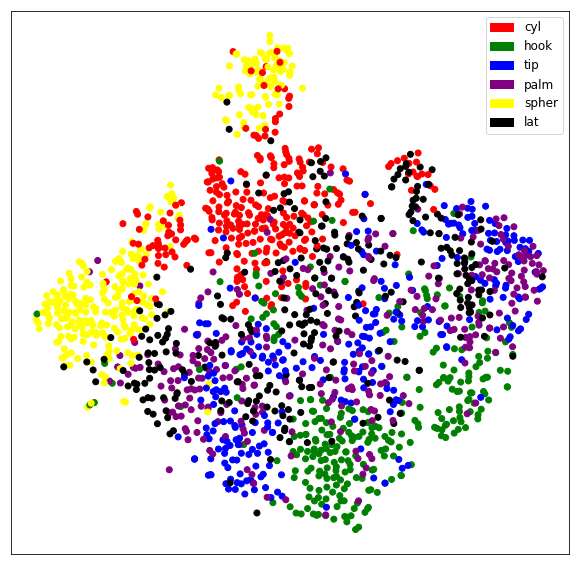

In [18]:
EMGFunctions.visualization(x,y,num_classes=6,legend=True,method="tsne")

We can use a plot like above for exploratory data analysis. For instance, the movement palm, which correponds to a palmer hand movement, did not seem to cluster that well in the above plot. This could mean that there might something about this movement which makes it hard to detect by the classifer. And as we will see below, the movements which tend to have a poor grouping in the tsne plot above, have a reletively lower accuracy score than other movements. This type of foreshadowing might lead us to go back and try to process the signals more or try better feature engineering. 

Since the features are now extracted, I can call various machine learning models to try classify each signal (now a list of features) as the movement the signal belongs to. In the following code, I call classification_train_test which trains a gradient boosting model using the first two days of recorded signals and then tests the model on the third day which the model has not seen before. 

In [19]:
EMGFunctions.classification_train_test(x,y, classifier_string = 'grad_boost',dataset_type = "one_subject")

Baseline Random is 16.7%
Accuracy on test set is:  57.99999999999999 %
              precision    recall  f1-score   support

         cyl       0.70      0.76      0.73       100
        hook       0.83      0.58      0.68       100
         lat       0.39      0.82      0.53       100
        palm       0.19      0.10      0.13       100
       spher       0.81      1.00      0.89       100
         tip       0.61      0.22      0.32       100

   micro avg       0.58      0.58      0.58       600
   macro avg       0.59      0.58      0.55       600
weighted avg       0.59      0.58      0.55       600



Below I perform similar analysis than above, but this time I used the dataset which contains five subjects. This allows me to see how well the models would work on people the model hasen't seen before. If the results are much worse, it could be because this signals can be very dependent on the person, even if the movement is the same. However, it should be noted that the five subjects only perform each movement 30 times as opposed to the single subject performing each movement 100 times.

Feature Extraction Progress
session num: (out of 5) 1 class num: (out of 12)  1
Feature Extraction Progress
session num: (out of 5) 2 class num: (out of 12)  1
Feature Extraction Progress
session num: (out of 5) 3 class num: (out of 12)  1
Feature Extraction Progress
session num: (out of 5) 4 class num: (out of 12)  1
Feature Extraction Progress
session num: (out of 5) 5 class num: (out of 12)  1
Feature Extraction Total Runtime: 0.27744542360305785 mins


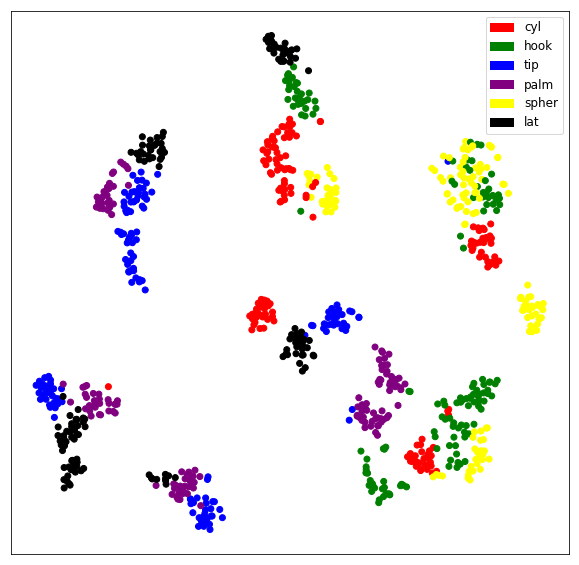

In [20]:
subjects_signals = EMGFunctions.load_hand_signals_five_subjects() # five subjects repeating each movement 30 times
num_trials = 30
num_sessions = 5 # five subjects

features_signals = EMGFunctions.feature_extraction(subjects_signals,feature_name_list=['rms_window'],window_length = 128, overlap_length = 64,
                                      ar_parameter = 11)

x = EMGFunctions.combine_channels(features_signals,num_trials)
y = EMGFunctions.get_combined_channel_classes(num_trials,num_sessions)

EMGFunctions.visualization(x,y,num_classes=6,legend=True,method="tsne")


In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # sklearn gives future warning which is not relevant here

EMGFunctions.classification_train_test(x,y, classifier_string = 'random_forest',dataset_type = "five_subjects")

Baseline Random is 16.7%
Accuracy on test set is:  40.0 %
              precision    recall  f1-score   support

         cyl       0.45      0.73      0.56        30
        hook       0.00      0.00      0.00        30
         lat       0.60      0.70      0.65        30
        palm       0.60      0.40      0.48        30
       spher       0.28      0.17      0.21        30
         tip       0.63      0.40      0.49        30

   micro avg       0.40      0.40      0.40       180
   macro avg       0.43      0.40      0.40       180
weighted avg       0.43      0.40      0.40       180



As we can see from the results above, the classifier does not do a great job generalizing to the hold out subject. This could be because there is a lot of variance in the emg signals of different people, perhaps because of the way the electrodes were placed and differences in movements between subjects.